# Breast Cancer Wisconsin (Diagnostic)  with Logistic Regression 




![](https://storage.googleapis.com/kaggle-datasets-images/180/384/3da2510581f9d3b902307ff8d06fe327/dataset-cover.jpg)

## Problem Statement

* Predicting whether a tumor is `benign` (noncancerous) or `malignant` (cancerous) using information like its radius, texture etc



#Step 1 - Download and Explore the Data

The dataset is available as a ZIP file at the following url:

In [147]:
dataset_url = "https://www.kaggle.com/datasets/uciml/breast-cancer-wisconsin-data"

In [148]:
!pip install opendatasets

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [149]:
import opendatasets as od
od.download(dataset_url)

Skipping, found downloaded files in "./breast-cancer-wisconsin-data" (use force=True to force download)


In [150]:
import os
data_dir='/content/breast-cancer-wisconsin-data'
os.listdir(data_dir)

['data.csv']

In [151]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [152]:
path= data_dir +"/data.csv"

> **QUESTION 1**: Load the data from the file `train.csv` into a Pandas data frame.

In [153]:
data=pd.read_csv(path)

In [154]:
data

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


The dataset contains over 559 rows and 33 columns. The dataset contains numeric and categorical columns. Our objective is to create a model to predict the value in the column `diagnosis`.

Let's explore the columns and data types within the dataset.

In [155]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [156]:
data=data.drop(["id","Unnamed: 32"],axis=1)

> **QUESTION 2**: How many rows and columns does the dataset contain? 

In [157]:
n_rows = data.shape[0]

In [158]:
n_cols = data.shape[1]

In [159]:
print('The dataset contains {} rows and {} columns.'.format(n_rows, n_cols))

The dataset contains 569 rows and 31 columns.


> **(OPTIONAL) QUESTION**: Before training the model, you may want to explore and visualize data from the various columns within the dataset, and study their relations. Create some graphs and summarize your insights using the empty cells below.

* libraries that we are going to use in this collab 

In [160]:
import seaborn as sns
import plotly.express as px
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
#The following settings will improve the default style and font sizes for our charts
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (10, 6)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

> **QUESTION 3**: How many `missing values` does the dataset contain? 

In [161]:
# Here we will check the percentage of nan values present in each feature
# 1 -step make the list of features which has missing values
feature_with_na=[feature for feature in data.columns if data[feature].isnull().sum()>1]
# 2- step print the feature name and the percentage of missing values
for feature in feature_with_na:
  print(feature, np.round(data[feature].isnull().mean(), 4)*100,  " % missing values")

## Exploratory Data Analysis and Visualization

Before training a machine learning model, its always a good idea to explore the distributions of various columns and see how they are related to the target column. Let's explore and visualize the data using the Plotly, Matplotlib and Seaborn libraries. Follow these tutorials to learn how to use these libraries:

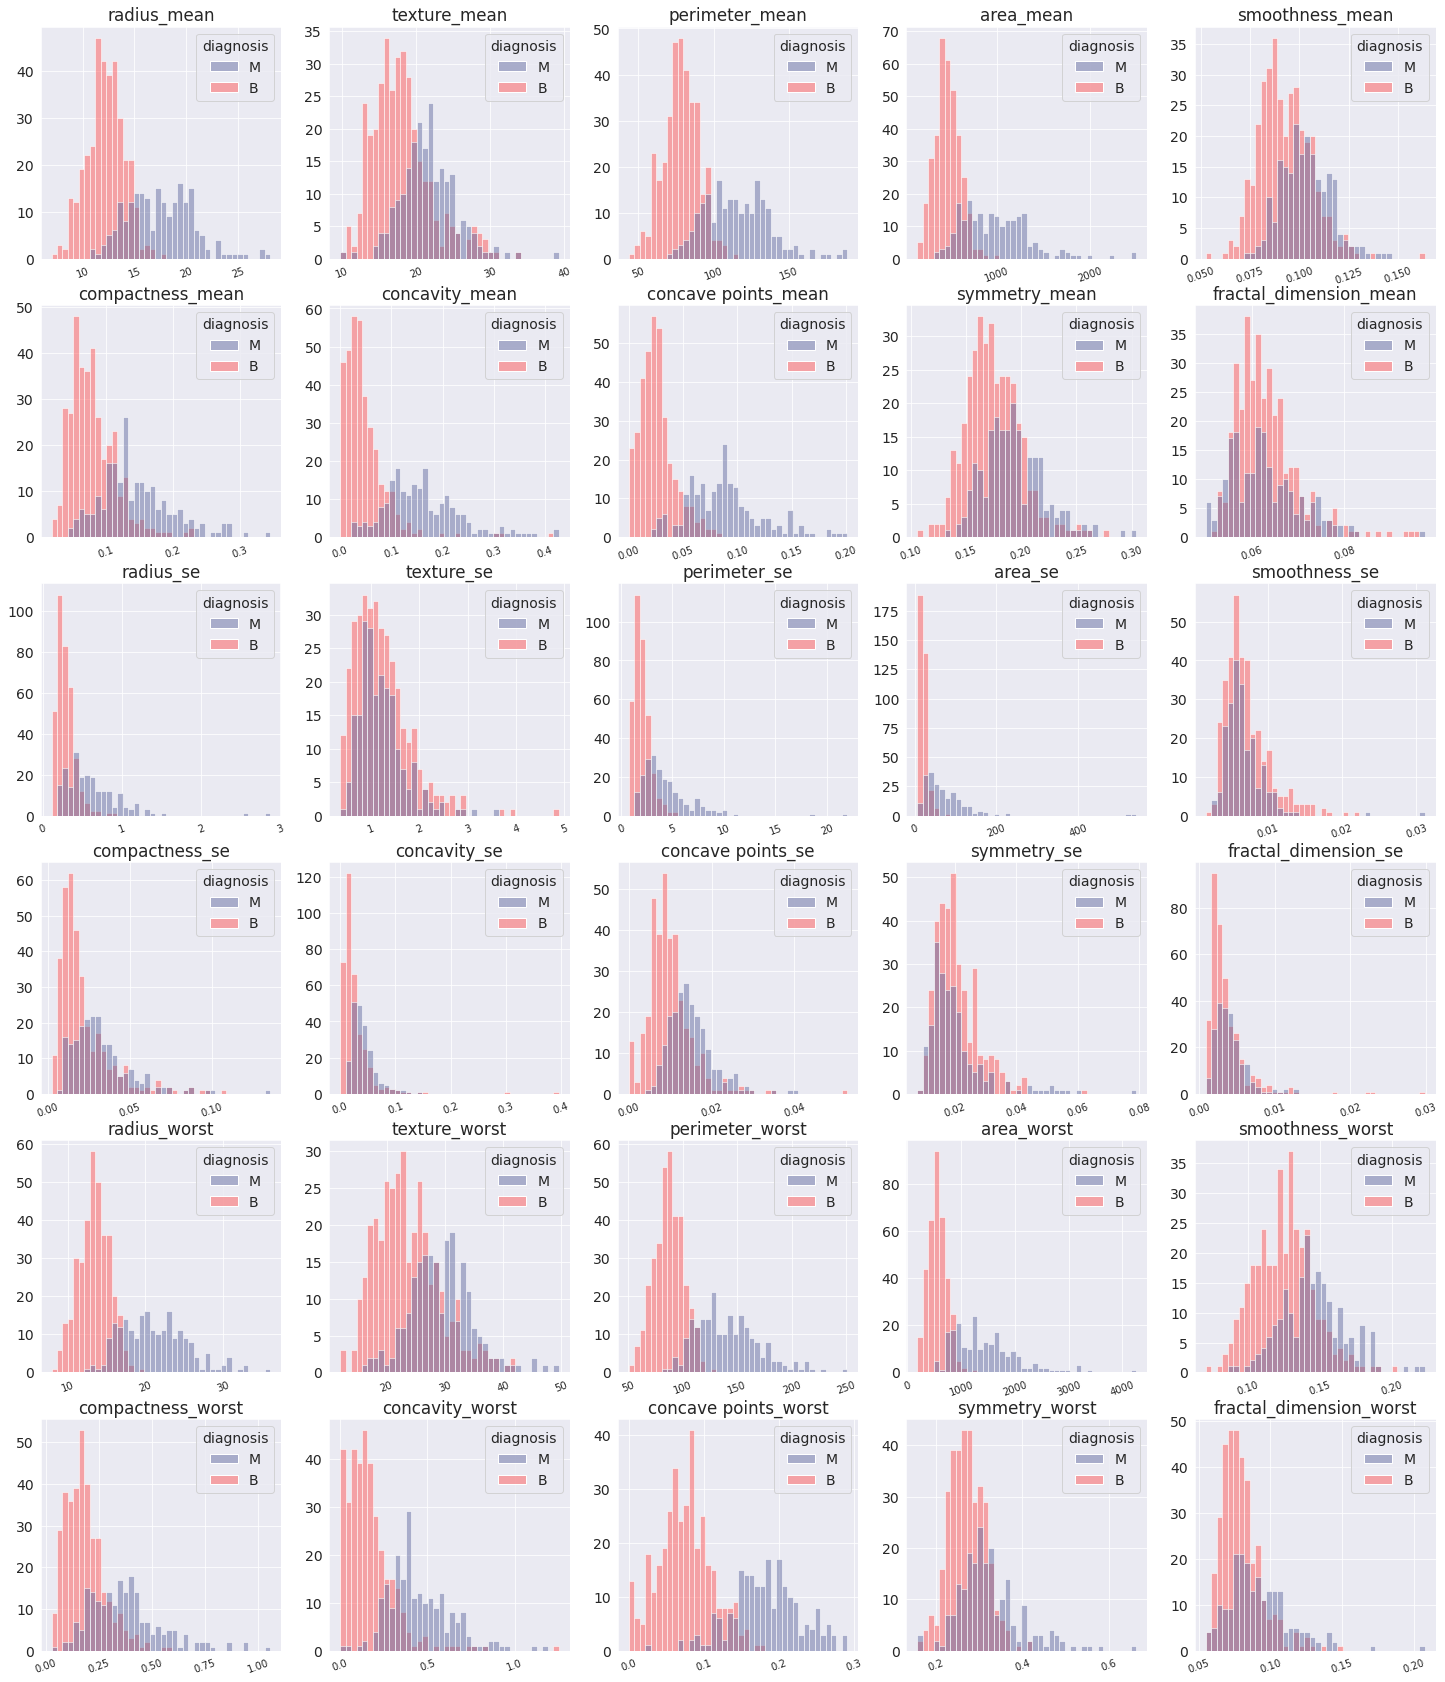

In [162]:
numerical = [feature for feature in data.columns if data[feature].dtype in ['int64', 'float64']]
df = data[numerical]

fig = plt.figure(figsize = (25, 35))

i=1
for n in df.columns:
    plt.subplot(7, 5, i)
    ax = sns.histplot(x = data[n],hue = data['diagnosis'], palette = ['#676FA3', '#FF5959'], bins = 40)
    ax.set(xlabel = None, ylabel = None)
    plt.title(str(n), loc = 'center')
    plt.xticks(rotation = 20, fontsize = 10)
    i += 1

# Step 2 - Prepare the Dataset for Training


Before we can train the model, we need to prepare the dataset. Here are the steps we'll follow:

1. Identify the input and target column(s) for training the model.
2. Identify numeric and categorical input columns.
3. [Impute](https://scikit-learn.org/stable/modules/impute.html) (fill) missing values in numeric columns
4. [Scale](https://scikit-learn.org/stable/modules/preprocessing.html#scaling-features-to-a-range) values in numeric columns to a $(0,1)$ range.
5. [Encode](https://scikit-learn.org/stable/modules/preprocessing.html#encoding-categorical-features) categorical data into one-hot vectors.
6. Split the dataset into training and validation sets.


In [163]:
data.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


## Identify Inputs and Targets

While the dataset contains `31` columns, not all of them are useful for modeling. Note the following:


- The first column `diagnosis` contains the value we need to predict i.e. it's the target column.
- Data from all the other columns (except the first) can be used as inputs to the model.
 

> **QUESTION 4**: Create a list `input_cols` of column names containing data that can be used as input to train the model, and identify the target column as the variable `target_col`.

In [164]:
# Identify the input columns (a list of column names)
input_cols = list(data.columns)[1:]

In [165]:
print(input_cols)

['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean', 'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se', 'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se', 'fractal_dimension_se', 'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst', 'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst']


In [166]:
# Identify the name of the target column (a single string, not a list)
target_col =list(data.columns)[0]

In [167]:
print(target_col)

diagnosis


Make sure that the `Id` and `SalePrice` columns are not included in `input_cols`.

Now that we've identified the input and target columns, we can separate input & target data.

In [168]:
inputs_df = data[input_cols]
targets = data[target_col]

In [169]:
inputs_df

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [170]:
targets

0      M
1      M
2      M
3      M
4      M
      ..
564    M
565    M
566    M
567    M
568    B
Name: diagnosis, Length: 569, dtype: object

##Identify Numeric and Categorical Data
The next step in data preparation is to identify numeric and categorical columns. We can do this by looking at the data type of each column.

> **QUESTION 5**: Crate two lists `numeric_cols` and `categorical_cols` containing names of numeric and categorical input columns within the dataframe respectively. Numeric columns have data types `int64` and `float64`, whereas categorical columns have the data type `object`.
>
> *Hint*: See this [StackOverflow question](https://stackoverflow.com/questions/25039626/how-do-i-find-numeric-columns-in-pandas). 

In [171]:
numeric_cols = inputs_df.select_dtypes(include=['int64', 'float64']).columns.tolist()

##Scale Numerical Values
The numeric columns in our dataset have varying ranges.

In [172]:
inputs_df[numeric_cols].describe().loc[['min', 'max']]

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
min,6.981,9.71,43.79,143.5,0.05263,0.01938,0.0000,0.0000,0.106,0.04996,...,7.93,12.02,50.41,185.2,0.07117,0.02729,0.000,0.000,0.1565,0.05504
max,28.110,39.28,188.50,2501.0,0.16340,0.34540,0.4268,0.2012,0.304,0.09744,...,36.04,49.54,251.20,4254.0,0.22260,1.05800,1.252,0.291,0.6638,0.20750


A good practice is to [scale numeric features](https://scikit-learn.org/stable/modules/preprocessing.html#scaling-features-to-a-range) to a small range of values e.g. $(0,1)$. Scaling numeric features ensures that no particular feature has a disproportionate impact on the model's loss. Optimization algorithms also work better in practice with smaller numbers.


> **QUESTION 6**: Scale numeric values to the $(0, 1)$ range using `MinMaxScaler` from `sklearn.preprocessing`.

In [173]:
from sklearn.preprocessing import MinMaxScaler

# Create the scaler
scaler = MinMaxScaler()

# Fit the scaler to the numeric columns
scaler.fit(inputs_df[numeric_cols])

# Transform and replace the numeric columns
inputs_df[numeric_cols] = scaler.transform(inputs_df[numeric_cols])

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:3678: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = igetitem(value, i)


After scaling, the ranges of all numeric columns should be (0, 1).

In [174]:
inputs_df[numeric_cols].describe().loc[['min', 'max']]

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
max,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


##Training and Validation Set
Finally, let's split the dataset into a training and validation set. We'll use a randomly select 25% subset of the data for validation. Also, we'll use just the numeric and encoded columns, since the inputs to our model must be numbers.

In [175]:
from sklearn.model_selection import train_test_split
train_inputs, val_inputs, train_targets, val_targets = train_test_split(inputs_df[numeric_cols], 
                                                                        targets, 
                                                                        test_size=0.40, 
                                                                        random_state=42)


In [176]:
train_inputs

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
296,0.185953,0.089280,0.175178,0.093404,0.293852,0.085363,0.028960,0.068042,0.196465,0.217987,...,0.122376,0.074627,0.109617,0.050875,0.144951,0.046347,0.023035,0.109759,0.113937,0.074708
490,0.249373,0.430504,0.237648,0.137010,0.264422,0.100055,0.040159,0.062674,0.244444,0.206403,...,0.221985,0.532249,0.210817,0.107575,0.359440,0.148548,0.098243,0.217698,0.302582,0.177030
519,0.273037,0.236388,0.267570,0.148590,0.540489,0.283173,0.090909,0.148857,0.535354,0.342671,...,0.231946,0.259062,0.215250,0.107870,0.504061,0.165527,0.113658,0.276460,0.296866,0.200249
513,0.359648,0.133581,0.348974,0.218579,0.412476,0.214097,0.192643,0.216153,0.342929,0.135636,...,0.314123,0.139126,0.289307,0.166339,0.337648,0.160579,0.199042,0.315670,0.209146,0.101272
473,0.250319,0.685154,0.232396,0.136543,0.219915,0.044783,0.000000,0.000000,0.323737,0.203033,...,0.196371,0.693763,0.172668,0.091845,0.152216,0.024100,0.000000,0.000000,0.166371,0.081267
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,0.090255,0.166723,0.103656,0.042630,0.408053,0.410159,0.201640,0.142744,0.425253,0.839090,...,0.064141,0.097281,0.060511,0.024381,0.327082,0.209865,0.114537,0.164467,0.135817,0.349993
106,0.220503,0.291512,0.216847,0.114104,0.555836,0.252500,0.165651,0.173211,0.374242,0.320977,...,0.185343,0.459488,0.174810,0.082703,0.644720,0.231598,0.229473,0.418557,0.244628,0.235668
270,0.345923,0.240446,0.321401,0.207466,0.105263,0.022606,0.016987,0.031064,0.226263,0.080034,...,0.248310,0.230011,0.219284,0.122739,0.095754,0.022383,0.030879,0.114536,0.176030,0.040404
435,0.331251,0.335137,0.327068,0.193425,0.481809,0.288080,0.263824,0.321223,0.307576,0.326032,...,0.324084,0.500533,0.316201,0.168133,0.595192,0.319692,0.325000,0.627835,0.318155,0.330972


In [177]:
train_targets

296    B
490    B
519    B
513    B
473    B
      ..
71     B
106    B
270    B
435    M
102    B
Name: diagnosis, Length: 341, dtype: object

In [178]:
val_inputs

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
204,0.259785,0.300643,0.257757,0.143542,0.424483,0.265076,0.187559,0.189911,0.436869,0.290017,...,0.250445,0.336354,0.227302,0.121092,0.471703,0.204238,0.213339,0.348797,0.285630,0.212908
70,0.565999,0.392289,0.551517,0.418452,0.338178,0.256181,0.253046,0.395179,0.263636,0.097936,...,0.602277,0.388060,0.575178,0.413095,0.317837,0.200163,0.214617,0.614777,0.194362,0.071166
131,0.401297,0.330402,0.400180,0.256797,0.510698,0.315686,0.343486,0.401938,0.439899,0.168492,...,0.403059,0.372601,0.370985,0.238596,0.550948,0.205790,0.302796,0.520275,0.250739,0.164961
431,0.256472,0.269530,0.260383,0.137561,0.476393,0.344212,0.181373,0.139115,0.379293,0.443555,...,0.176094,0.290245,0.195229,0.081252,0.487552,0.228590,0.191933,0.253265,0.195348,0.252853
540,0.215770,0.159959,0.213254,0.110032,0.426198,0.284093,0.157849,0.128926,0.382828,0.376158,...,0.154038,0.204158,0.141292,0.066998,0.418213,0.179013,0.143530,0.237732,0.150601,0.172504
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17,0.433007,0.370984,0.444406,0.277964,0.581114,0.560763,0.403468,0.510934,0.557576,0.497051,...,0.463536,0.518657,0.430251,0.277674,0.711418,0.384211,0.382109,0.712371,0.422038,0.388036
268,0.278716,0.219817,0.266671,0.156394,0.375734,0.131311,0.091378,0.080268,0.479798,0.162805,...,0.212380,0.309701,0.193536,0.101332,0.359440,0.148936,0.159105,0.198625,0.401932,0.102191
66,0.117564,0.382144,0.112777,0.053404,0.467365,0.178977,0.050890,0.074751,0.331818,0.400800,...,0.088225,0.520789,0.082773,0.035760,0.552268,0.134965,0.075176,0.223952,0.258821,0.243146
272,0.698992,0.381468,0.715293,0.571580,0.373567,0.542053,0.514292,0.540755,0.333838,0.252317,...,0.720740,0.430704,0.724588,0.540405,0.370006,0.431945,0.463818,0.632646,0.249951,0.219992


In [179]:
val_targets

204    B
70     M
131    M
431    B
540    B
      ..
17     M
268    B
66     B
272    M
494    B
Name: diagnosis, Length: 228, dtype: object

# Step 3 - Training a Logistic Regression Model

 

Logistic regression is a commonly used technique for solving binary classification problems. In a logistic regression model: 

- we take linear combination (or weighted sum of the input features) 
- we apply the sigmoid function to the result to obtain a number between 0 and 1
- this number represents the probability of the input being classified as "Yes"
- instead of RMSE, the cross entropy loss function is used to evaluate the results


Here's a visual summary of how a logistic regression model is structured ([source](http://datahacker.rs/005-pytorch-logistic-regression-in-pytorch/)):


<img src="https://i.imgur.com/YMaMo5D.png" width="480">

The sigmoid function applied to the linear combination of inputs has the following formula:

<img src="https://i.imgur.com/sAVwvZP.png" width="400">

To train a logistic regression model, we can use the `LogisticRegression` class from Scikit-learn.

> **QUESTION 7**: Create and train a Logistic Regression model from `sklearn.linear_model`.

In [180]:
from sklearn.linear_model import LogisticRegression

# Create the model
model = LogisticRegression(solver='liblinear')

# Fit the model using inputs and targets
model.fit(train_inputs,train_targets)

LogisticRegression(solver='liblinear')

`model.fit` uses the following strategy for training the model (source):

1. We initialize a model with random parameters (weights & biases).
2. We pass some inputs into the model to obtain predictions.
3. We compare the model's predictions with the actual targets using the loss function.
4. We use an optimization technique (like least squares, gradient descent etc.) to reduce the loss by adjusting the weights & biases of the model
5. We repeat steps 1 to 4 till the predictions from the model are good enough.

<img src="https://www.deepnetts.com/blog/wp-content/uploads/2019/02/SupervisedLearning.png" width="480">

# Step 4 - Make Predictions and Evaluate Your Model

The model is now trained, and we can use it to generate predictions for the training and validation inputs. We can evaluate the model's performance using the RMSE (root mean squared error) loss function.

> **QUESTION 10**: Generate predictions and compute the RMSE loss for the training and validation sets. 
> 
> *Hint*: Use the `mean_squared_error` with the argument `squared=False` to compute RMSE loss.

In [181]:
train_preds =model.predict(train_inputs)

In [182]:
train_preds

array(['B', 'B', 'B', 'B', 'B', 'B', 'M', 'M', 'M', 'B', 'B', 'M', 'B',
       'B', 'M', 'B', 'M', 'B', 'M', 'B', 'B', 'B', 'B', 'M', 'B', 'B',
       'B', 'M', 'B', 'M', 'B', 'M', 'B', 'M', 'B', 'B', 'M', 'B', 'B',
       'B', 'B', 'M', 'B', 'B', 'B', 'M', 'B', 'B', 'M', 'B', 'B', 'M',
       'B', 'B', 'B', 'B', 'B', 'B', 'B', 'M', 'B', 'B', 'B', 'M', 'B',
       'M', 'B', 'B', 'B', 'M', 'B', 'M', 'M', 'B', 'B', 'M', 'B', 'M',
       'M', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'M', 'B', 'M', 'B', 'B',
       'B', 'M', 'B', 'M', 'B', 'B', 'M', 'M', 'B', 'B', 'M', 'B', 'M',
       'M', 'B', 'M', 'M', 'B', 'B', 'M', 'M', 'M', 'B', 'B', 'B', 'B',
       'M', 'B', 'M', 'M', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B',
       'B', 'M', 'M', 'M', 'B', 'M', 'B', 'B', 'B', 'B', 'B', 'M', 'B',
       'B', 'M', 'M', 'B', 'M', 'B', 'M', 'B', 'B', 'B', 'B', 'B', 'B',
       'M', 'B', 'B', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'M', 'B', 'B',
       'M', 'B', 'M', 'M', 'M', 'B', 'M', 'B', 'B', 'M', 'M', 'M

We can output a probabilistic prediction using `predict_proba`.

In [183]:
train_probs = model.predict_proba(train_inputs)
train_probs

array([[9.80864977e-01, 1.91350229e-02],
       [8.61070213e-01, 1.38929787e-01],
       [8.83252577e-01, 1.16747423e-01],
       [7.17772633e-01, 2.82227367e-01],
       [9.45164476e-01, 5.48355241e-02],
       [9.06376249e-01, 9.36237512e-02],
       [4.07130073e-01, 5.92869927e-01],
       [1.36267470e-01, 8.63732530e-01],
       [2.80678612e-04, 9.99719321e-01],
       [9.54109614e-01, 4.58903858e-02],
       [7.96724097e-01, 2.03275903e-01],
       [1.37058850e-02, 9.86294115e-01],
       [8.78182202e-01, 1.21817798e-01],
       [8.96741522e-01, 1.03258478e-01],
       [1.14087469e-01, 8.85912531e-01],
       [8.84338007e-01, 1.15661993e-01],
       [3.89272150e-01, 6.10727850e-01],
       [9.81570099e-01, 1.84299013e-02],
       [2.27332179e-02, 9.77266782e-01],
       [8.81082233e-01, 1.18917767e-01],
       [6.08834983e-01, 3.91165017e-01],
       [9.38201528e-01, 6.17984723e-02],
       [5.93915033e-01, 4.06084967e-01],
       [3.25518736e-01, 6.74481264e-01],
       [8.644021

The numbers above indicate the probabilities for the target classes "No" and "Yes".

We can test the accuracy of the model's predictions by computing the percentage of matching values in `train_preds` and `train_targets`.

This can be done using the `accuracy_score` function from `sklearn.metrics`.

In [184]:
from sklearn.metrics import accuracy_score
score_T=accuracy_score(train_targets, train_preds)*100
print('The accuracy score for the validation set is {}%.'.format(score_T))

The accuracy score for the validation set is 96.7741935483871%.


The model achieves an accuracy of 85.1% on the training set. We can visualize the breakdown of correctly and incorrectly classified inputs using a confusion matrix.

<img src="https://i.imgur.com/UM28BCN.png" width="480">

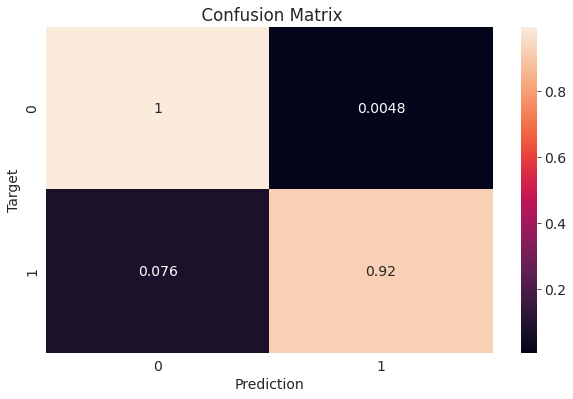

In [185]:
# Confussion Matricx
from sklearn.metrics import confusion_matrix
cf=confusion_matrix(train_targets, train_preds, normalize='true')
plt.figure()
sns.heatmap(cf, annot=True)
plt.xlabel('Prediction')
plt.ylabel('Target')
plt.title(' Confusion Matrix');

In [186]:
val_preds = model.predict(val_inputs)

In [187]:
val_preds

array(['B', 'M', 'M', 'B', 'B', 'M', 'M', 'M', 'M', 'B', 'B', 'M', 'B',
       'M', 'B', 'M', 'B', 'B', 'B', 'M', 'B', 'B', 'M', 'B', 'B', 'B',
       'B', 'B', 'B', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'M',
       'B', 'B', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'M', 'M',
       'B', 'B', 'B', 'B', 'B', 'M', 'M', 'B', 'B', 'M', 'M', 'B', 'B',
       'B', 'M', 'M', 'B', 'B', 'M', 'M', 'B', 'M', 'B', 'B', 'B', 'B',
       'B', 'B', 'M', 'B', 'B', 'M', 'M', 'M', 'M', 'M', 'B', 'B', 'B',
       'B', 'B', 'B', 'B', 'B', 'M', 'M', 'B', 'M', 'M', 'B', 'M', 'M',
       'B', 'B', 'B', 'M', 'B', 'B', 'M', 'B', 'B', 'M', 'B', 'M', 'B',
       'B', 'B', 'M', 'B', 'B', 'B', 'M', 'B', 'M', 'M', 'B', 'B', 'M',
       'M', 'M', 'B', 'B', 'B', 'M', 'B', 'B', 'B', 'M', 'B', 'M', 'B',
       'B', 'M', 'B', 'M', 'M', 'B', 'B', 'M', 'B', 'B', 'B', 'B', 'M',
       'M', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B',
       'M', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B

In [188]:
score_V=accuracy_score(val_targets, val_preds)*100
print('The accuracy score for the validation set is {}%.'.format(score_V))

The accuracy score for the validation set is 95.6140350877193%.


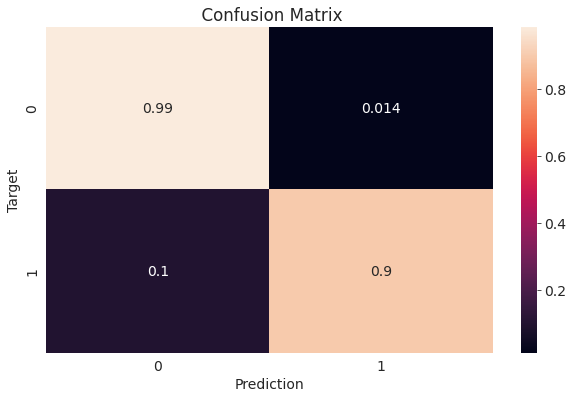

In [189]:
# Confussion Matricx
cf1=confusion_matrix(val_targets, val_preds, normalize='true')
plt.figure()
sns.heatmap(cf1, annot=True)
plt.xlabel('Prediction')
plt.ylabel('Target')
plt.title(' Confusion Matrix');

The accuracy of the model on the test and validation set are above 96%, which suggests that our model generalizes well to data it hasn't seen before. 


## Feature Importance

Let's look at the weights assigned to different columns, to figure out which columns in the dataset are the most important.

> **QUESTION 11**: Identify the weights (or coefficients) assigned to for different features by the model.
> 
> *Hint:* Read [the docs](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html).

In [190]:
weights = model.coef_.flatten()

Let's create a dataframe to view the weight assigned to each column.

In [191]:
weights_df = pd.DataFrame({
    'columns': train_inputs.columns,
    'weight': weights
}).sort_values('weight', ascending=False)

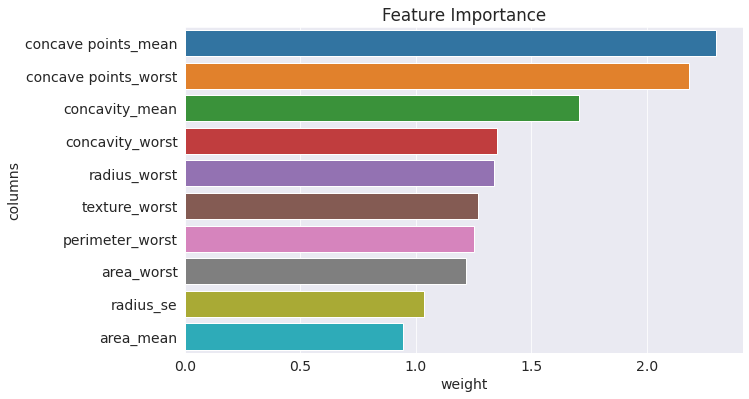

In [192]:
plt.title('Feature Importance')
sns.barplot(data=weights_df.head(10), x='weight', y='columns');

##Making Predictions
The model can be used to make predictions on new inputs using the following helper function:

In [193]:
def predict_input(single_input):
    input_df = pd.DataFrame([single_input])
    input_df[numeric_cols] = scaler.transform(input_df[numeric_cols])
    X_input = input_df[numeric_cols]
    pred = model.predict(X_input)[0]
    prob = model.predict_proba(X_input)[0][list(model.classes_).index(pred)]
    return pred, prob

In [194]:
predict_input(new_input)

NameError: ignored

##Saving the model
Let's save the model (along with other useful objects) to disk, so that we use it for making predictions without retraining.

In [ ]:
import joblib

In [ ]:
Breast_Cancer_Predictor = {
    'model': model,
    'scaler': scaler,
    'input_cols': input_cols,
    'target_col': target_col,
    'numeric_cols': numeric_cols,

}

In [ ]:
joblib.dump(Breast_Cancer_Predictor, 'Breast_Cancer_Predictor.joblib')

The object can be loaded back using `joblib.load`

In [ ]:
Breast_Cancer_Predictor1 = joblib.load('Breast_Cancer_Predictor.joblib')

Let's use the loaded model to make predictions on the original test set.

In [ ]:
test_preds2 = Breast_Cancer_Predictor1['model'].predict(val_inputs)
accuracy_score(val_targets, test_preds2)

As expected, we get the same result as the original model.

> `THANK YOU`